# Wine assignment | Asger and Daniel

In [238]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sbn

In [239]:
# Read the files
# header=1 is added because the original header was Unnamed
red_df = pd.read_excel("winequality-red.xlsx", header=1)
white_df = pd.read_excel("winequality-white.xlsx", header=1)



## Hypothesis and expectations

* H0 = Our hypothesis is the alcohol average for red and white wine are the same.
* H1 = Alternative hypothesis is one wine has a higher alcohol average.

## 1) Start Exploration of red wine 

In [240]:
#Size of dataframe
red_df.shape

(1599, 12)

In [241]:
#Data types and attibute names | no categories
red_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [242]:
# The range, mean, count, quartiles and standard deviations
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [243]:
# The first 5 
red_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [244]:
# Sample of 5 
red_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
527,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4,6
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,6
933,7.4,0.61,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
599,12.7,0.59,0.45,2.3,0.082,11.0,22.0,1.00000,3.00,0.70,9.3,6
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


## 1.1) Start Exploration of white wine

In [245]:
# Size of dataframe
white_df.shape

(4898, 12)

In [246]:
# Datatypes and row names | no categories
white_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [247]:
# The range, mean, count, quartiles and standard deviations
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [248]:
# The first 5
white_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [249]:
# Sample of 5
white_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
683,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.9948,3.12,0.48,9.4,5
47,6.2,0.46,0.25,4.4,0.066,62.0,207.0,0.9939,3.25,0.52,9.8,5
1849,7.0,0.24,0.25,1.7,0.042,48.0,189.0,0.9920,3.25,0.42,11.4,6
1382,6.6,0.56,0.16,3.1,0.045,28.0,92.0,0.9940,3.12,0.35,9.1,6
4556,6.1,0.20,0.40,1.9,0.028,32.0,138.0,0.9914,3.26,0.72,11.7,5


## 3) Cleaning

In [250]:
# Checking NaN for red wine
red_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [251]:
# Checking NaN for white wine
white_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [252]:
#Checking duplicates for red wine
red_df.duplicated().sum()

np.int64(240)

In [253]:
#Removing the 240 duplicates from red wine
red_df.drop_duplicates(inplace = True)

In [254]:
#Checking duplicates for red wine again
red_df.duplicated().sum()

np.int64(0)

In [255]:
#Checking duplicates for white wine
white_df.duplicated().sum()

np.int64(937)

In [256]:
#Removing the 937 duplicates from white wine
white_df.drop_duplicates(inplace = True)

In [257]:
#Checking duplicates for white wine again
white_df.duplicated().sum()

np.int64(0)

## 4+5) Merging

In [258]:
# Making a "type" column in both sets to see the difference when we merge them
red_df["type"] = 1

In [259]:
white_df["type"] = 2

In [260]:
# Merging them together via. concat because they have the same row names.
mergedwine = pd.concat([red_df, white_df], axis=0)

In [261]:
mergedwine.info()

<class 'pandas.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


In [262]:
#Checking 5 randoms from the merged dataframe
mergedwine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3962,7.2,0.580,0.27,5.8,0.032,40.0,118.0,0.99088,3.17,0.53,13.0,7,2
237,7.2,0.645,0.00,1.9,0.097,15.0,39.0,0.99675,3.37,0.58,9.2,6,1
136,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,5,1
1673,6.6,0.270,0.31,5.3,0.137,35.0,163.0,0.99510,3.20,0.38,9.3,5,2
3944,6.1,0.270,0.32,6.2,0.048,47.0,161.0,0.99281,3.22,0.60,11.0,6,2


## 6) The attributes are independent so we want to make an attribute that depends on quality in the merged set

In [263]:
# Making a dependant row for quality with category
labels=["Low", "Medium", "High"]
bins=[0, 3, 6, np.inf]
mergedwine["quality_level"] = mergedwine["quality"]
mergedwine["quality_level"] = pd.cut(mergedwine["quality_level"], labels=labels, bins=bins)

In [264]:
#Checking the sum for each quality level
mergedwine["quality_level"].value_counts()

quality_level
Medium    4281
High      1009
Low         30
Name: count, dtype: int64

## 7+8) Data exploration, measures and handling outliers

In [265]:
#We use describe() to look at the mean(), quartiles, standard deviation and range

In [266]:
# Red wine describes: (Example: We can see the mean of alcohol is 10.4)
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.0
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,1.0
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [267]:
#White wine describes: (Example we can se the mean of alcohol is 10.6)
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.0
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835,2.0
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,2.0
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000,2.0
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000,2.0
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000,2.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,2.0


In [268]:
#Combined descriptive statistics of the wines (Example we can see the mean of the alcohol is 10.5)
mergedwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,1.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,2.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


### Check about attributes are normally distributed

<Axes: title={'center': 'Alcohol distribution - Red wine'}, ylabel='Frequency'>

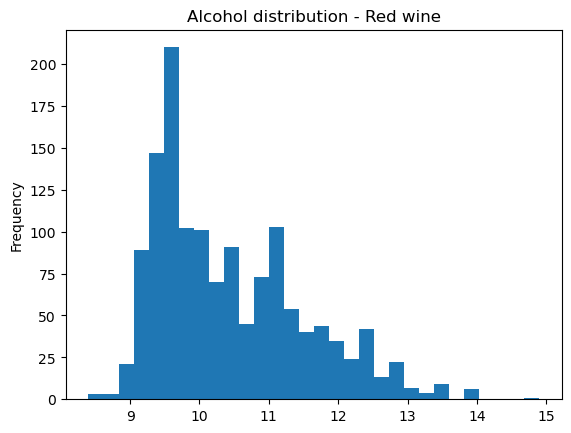

In [269]:
#Histogram to of alcohol in red dataframe - right skewed (positive skewed)
red_df['alcohol'].plot.hist(bins=30, title='Alcohol distribution - Red wine')

In [270]:
red_df["alcohol"].skew()

np.float64(0.8598411692032926)

<Axes: title={'center': 'Alcohol distribution - White wine'}, ylabel='Frequency'>

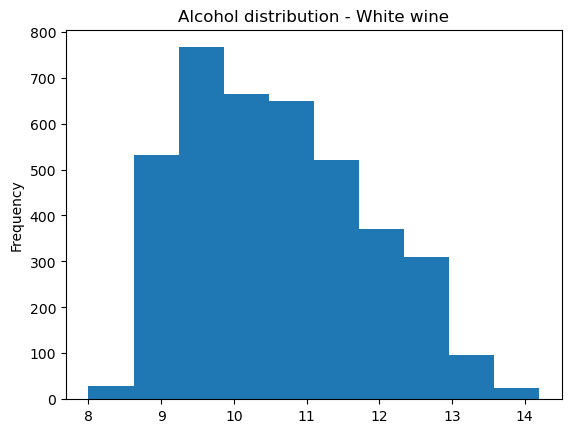

In [271]:
# It has more deviation than red histogram, the most frequent value isnt as dominant as in red histogram.
white_df['alcohol'].plot.hist(title='Alcohol distribution - White wine')

<Axes: title={'center': 'Alcohol distribution | White- and red wine'}, ylabel='Frequency'>

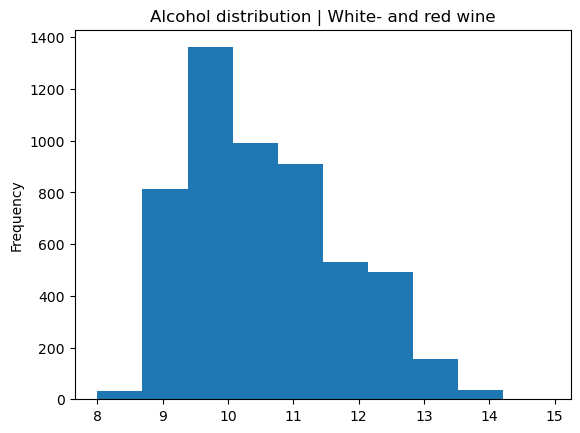

In [272]:
mergedwine['alcohol'].plot.hist(title='Alcohol distribution | White- and red wine')

### Comparing distributions in the merged dataset

<Axes: title={'center': 'alcohol'}, xlabel='type'>

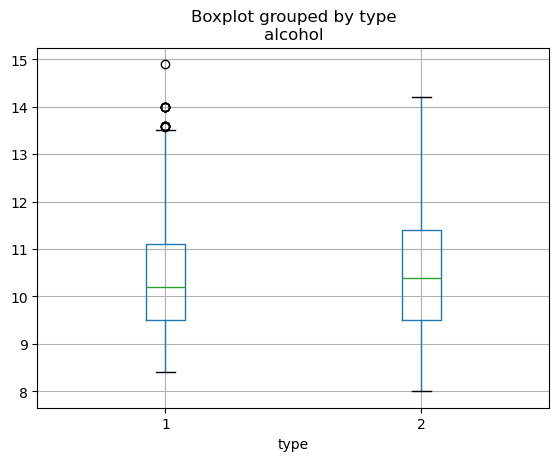

In [273]:
#Boxplot by alcohol and type of wine. You can see we have some outliers in type 1 aka red wine
#because they are outside the whiskers.
mergedwine.boxplot(column='alcohol', by='type')

<Axes: title={'center': 'quality'}, xlabel='type'>

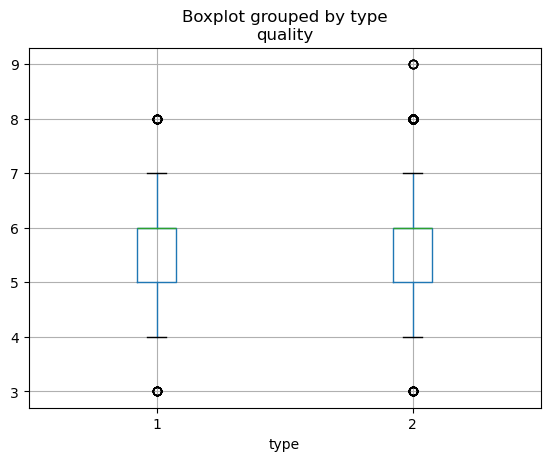

In [274]:
mergedwine.boxplot(column='quality', by='type')

### Comparing discriptive statistics in the merged dataset

In [275]:
mergedwine.groupby('type')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
1,1359.0,10.432315,1.082065,8.4,9.5,10.2,11.1,14.9
2,3961.0,10.589358,1.217076,8.0,9.5,10.4,11.4,14.2


In [276]:
mergedwine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
1,1359.0,5.623252,0.823578,3.0,5.0,6.0,6.0,8.0
2,3961.0,5.854835,0.890683,3.0,5.0,6.0,6.0,9.0


<Axes: title={'center': 'residual sugar'}, xlabel='type'>

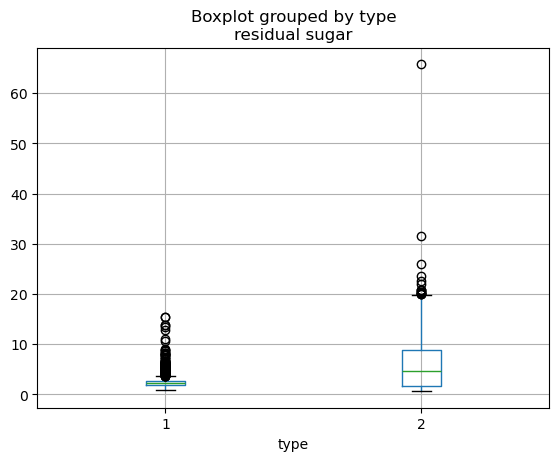

In [277]:
#We can see a huge outlier for residual sugar in white wine
mergedwine.boxplot(column="residual sugar", by="type")

### Removing outliers

In [278]:
# Looking for outliers: (Q3 -Q1) * 1.5 
#outliers by inter-quartile range (IQR)
from typing import List
def remove_outliers(df, data: List, factor):
    q1 = df[data].quantile(.25)
    q3 = df[data].quantile(.75)
    IQR = q3 - q1
    # values smaller than 1.5 IQR below q1 and bigger than 1.5 IQR over q3
    outliers = df[(df[data] < (q1 - factor * IQR)) | (df[data] > (q3 + factor * IQR))]
    df = df.drop(outliers.index)
    return df

In [279]:
#Using IQR to remove outliers
redsub = remove_outliers(red_df, "alcohol", factor=1.5)

<Axes: ylabel='Frequency'>

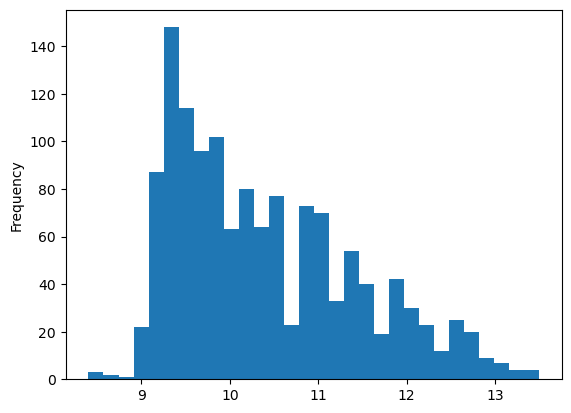

In [280]:
# Removing the outliers to see if it made an impact
redsub["alcohol"].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

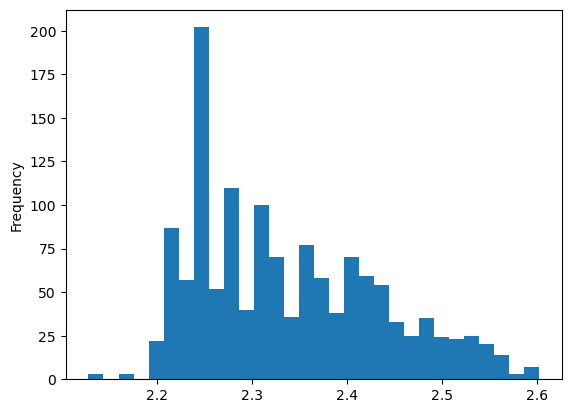

In [281]:
#Becuase removing outliers didnt make such an impact we will try to log it to see if it changes the distrubution
redsub["alcohol_log"] = np.log(redsub["alcohol"])
redsub["alcohol_log"].plot.hist(bins=30)

##### There is not a normal distrubution in alcohol because most of the values is around 9 and when we remove the outliers most of the values still is around 9 so when we use the log function there shouldnt be much of a difference when we look at distrubution. Example the numbers is still going to be placed at 2.2-2.3

In [282]:
red_df["alcohol"].skew()

np.float64(0.8598411692032926)

In [283]:
redsub["alcohol"].skew()

np.float64(0.7320876355355268)

In [284]:
# Checking the mean before removing outliers for red- and white wine
mergedwine.groupby("type")["alcohol"].mean()

type
1    10.432315
2    10.589358
Name: alcohol, dtype: float64

In [285]:
# The mean after removing outliers from red wine
redsub["alcohol"].mean()

np.float64(10.401373422420194)

#### By removing the outliers the value of skew comes closer to 0
#### There weren't any outliers in white wine therefore we didnt remove any

In [286]:
red_df["alcohol"].kurt()

np.float64(0.1597388547368781)

In [287]:
redsub["alcohol"].kurt()

np.float64(-0.3256463820420339)

#### By removing the outliers we can see the Kurtosis value became negative therefore meaning no extreme outliers

## 9) Differences and similarities

<Axes: title={'center': 'Quality distribution'}, ylabel='Frequency'>

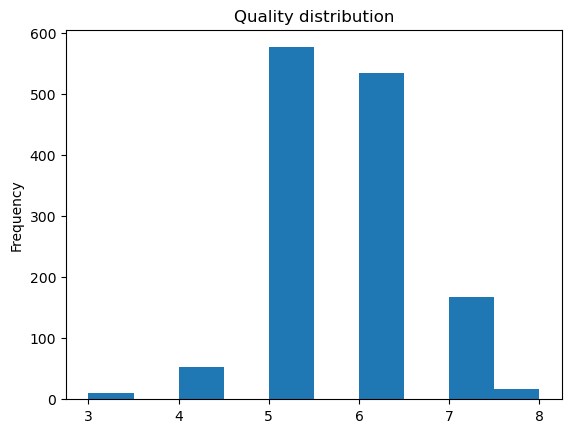

In [288]:
mergedwine[mergedwine['type']==1]['quality'].plot.hist(title='Quality distribution')

<Axes: title={'center': 'Quality distribution'}, ylabel='Frequency'>

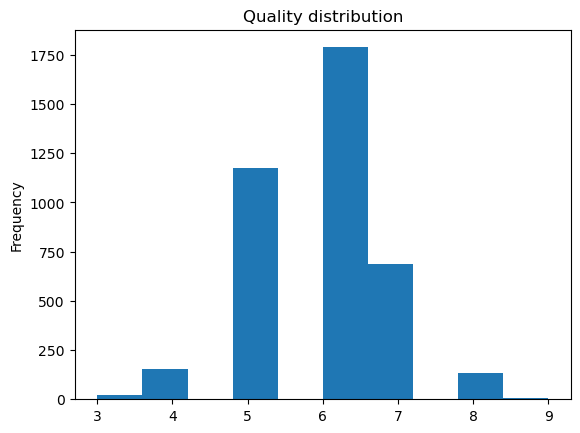

In [289]:
mergedwine[mergedwine['type']==2]['quality'].plot.hist(title='Quality distribution')

#### Diagrammerne viser en tydelig spredning

<Axes: title={'center': 'quality'}, xlabel='type'>

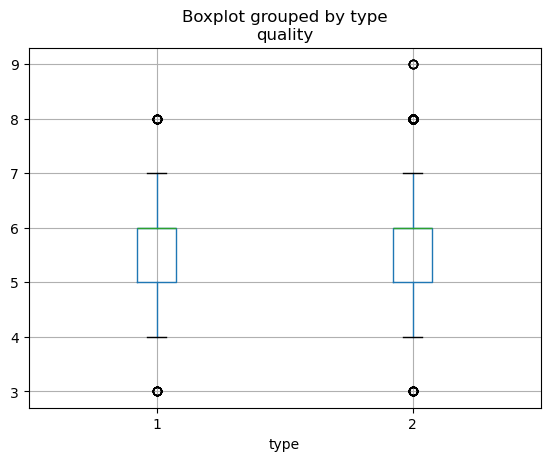

In [290]:
mergedwine.boxplot(column='quality', by='type')

<Axes: title={'center': 'alcohol'}, xlabel='type'>

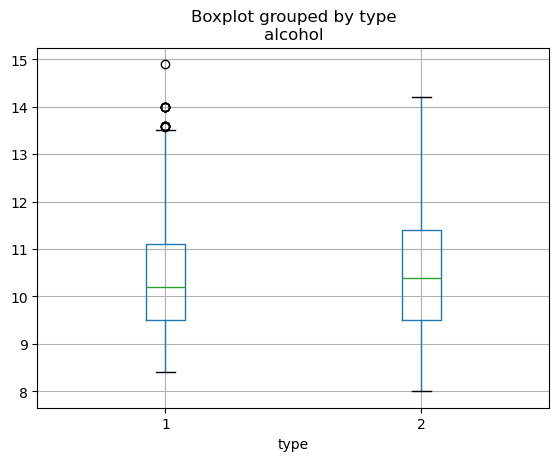

In [291]:
#### Shows the outliers clear like the diagrams above. The centering is at 5 & 6.
#### The green line shows the median

mergedwine.boxplot(column='alcohol', by='type')

#### Showing outliers again, the median and the difference of  alcohol % in red and white.

<Axes: title={'center': 'free sulfur dioxide'}, xlabel='type'>

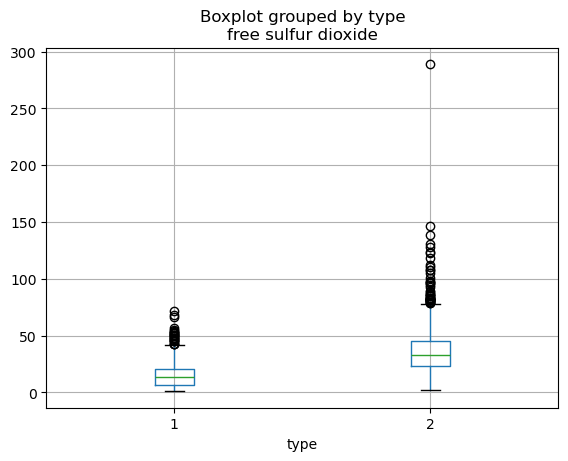

In [292]:
mergedwine.boxplot(column='free sulfur dioxide', by='type')

#### Very different than the other diagrams, here you can see the outliers clearly on both sides
#### The amount of 'free sulfur dioxide' show a big "std" compared to eachother

### b. which wine has higher average quality?

In [293]:
mergedwine.groupby('type')['quality'].mean()

type
1    5.623252
2    5.854835
Name: quality, dtype: float64

#### Red wine average quality = 5,623252
#### White wine average quality = 5,854835 (winner)

### c. which type of wine has higher average level of alcohol?

In [294]:
mergedwine.groupby('type')['alcohol'].mean()

type
1    10.432315
2    10.589358
Name: alcohol, dtype: float64

#### Red wine average alcohol = 10,432315
#### White wine average alcohol = 10,589358 (winner)

#### d. which one has higher average quantity of residual sugar?

In [296]:
mergedwine.groupby('type')['residual sugar'].mean()

type
1    2.523400
2    5.914819
Name: residual sugar, dtype: float64

In [297]:
mergedwine_no_extreme_outlier = mergedwine[(mergedwine["residual sugar"] < 64)]

In [298]:
mergedwine_no_extreme_outlier.groupby("type")["residual sugar"].mean()

type
1    2.523400
2    5.899697
Name: residual sugar, dtype: float64

##### We removed the one EXTREME outlier by hardcoding it

#### Red wine average residual sugar = 2,523400
#### White wine average residual sugar = 5.899697

#### e. do the quantity of alcohol and residual sugar influence the quality of the wine?

In [304]:
mergedwine[['alcohol','quality']].corr()

,alcohol,quality
alcohol,1.000000,0.469422
quality,0.469422,1.000000


##### #0.469422 positiv sammenhæng men ikke klokkeklart

In [308]:
mergedwine[['residual sugar','quality']].corr() 

,residual sugar,quality
residual sugar,1.00000,-0.05683
quality,-0.05683,1.00000


##### -0.05683 negativ sammenhæng dvs ingen sammenhæng

In [311]:
red_df[['alcohol','quality']].corr()

,alcohol,quality
alcohol,1.000000,0.480343
quality,0.480343,1.000000


##### o.480343 positiv sammenhæng men slet ikke klokkeklart

In [313]:
white_df[['residual sugar','quality']].corr()

,residual sugar,quality
residual sugar,1.000000,-0.117339
quality,-0.117339,1.000000


##### -0.117339 negativ sammenhæng, altså slet ikke noget

##### Konklusion er at ingen af dem er særlig tæt på 1, så der er ikke nogen klokkeklar sammenhæng

# 10

### Making 5 bins

In [316]:
mergedwine["pH_bin_5"] = pd.cut(mergedwine["pH"], bins=10)
mergedwine["pH_bin_5"]

0       (3.494, 3.623]
1       (3.107, 3.236]
2       (3.236, 3.365]
3       (3.107, 3.236]
5       (3.494, 3.623]
             ...      
4893    (3.236, 3.365]
4894    (3.107, 3.236]
4895    (2.978, 3.107]
4896    (3.236, 3.365]
4897    (3.236, 3.365]
Name: pH_bin_5, Length: 5320, dtype: category
Categories (10, interval[float64, right]): [(2.719, 2.849] < (2.849, 2.978] < (2.978, 3.107] < (3.107, 3.236] ... (3.494, 3.623] < (3.623, 3.752] < (3.752, 3.881] < (3.881, 4.01]]

##### Count the amount in every bin 


In [319]:
density_5 = mergedwine["pH_bin_5"].value_counts().sort_index()
density_5

pH_bin_5
(2.719, 2.849]      14
(2.849, 2.978]     239
(2.978, 3.107]     969
(3.107, 3.236]    1718
(3.236, 3.365]    1403
(3.365, 3.494]     686
(3.494, 3.623]     228
(3.623, 3.752]      47
(3.752, 3.881]      12
(3.881, 4.01]        4
Name: count, dtype: int64

##### Det giver et overblik over spredningen af ph-værdierne fra lavest til høj og hvor centreringen ligger

# 11)

##### Vin producenter kunne være interesserede i hvad der påvirker hinanden, som f.eks:
##### alkohol vs kvalitet
##### ph vs kvalitet
##### Forburgere kunne være interesserede i om mere alkohol betyder højere kvalitet?
##### eller residual sugar vs kvalitet?

# 12+13) Correlation + heatmap

In [322]:
# Correlation
# We use Pearson correlation function for numeric values of two sets, each with normal distribution.
corr1 = stats.pearsonr(mergedwine["residual sugar"], mergedwine["alcohol"])
corr1 
#corr 1 between residual sugar and alcohol has correlation but it is not strong

PearsonRResult(statistic=np.float64(-0.3052420355899367), pvalue=np.float64(4.087748791205293e-115))

In [323]:
# correrlation matrix
# We need to remove our quality_level because it is a category, then we look at all the r values to see correlation 
# between the attributes
num_cols = mergedwine.select_dtypes(include="number")
cmat = num_cols.corr()
cmat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092,-0.486253
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205,-0.645335
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954,0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137,-0.499517
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002,0.465326
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884,-0.490364


<Axes: >

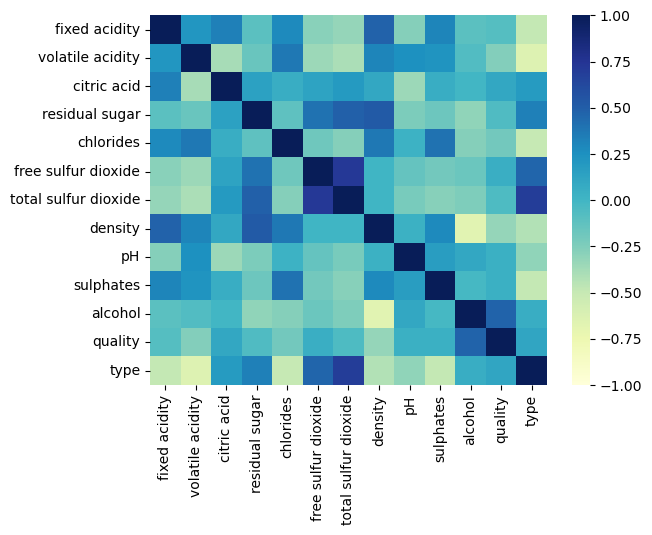

In [324]:
#Making a heatmap using seaborn import. We are using the correlation matrix "cmat" 
sbn.heatmap(cmat, cmap="YlGnBu", annot=False, vmin=-1, vmax=1)

On the heatmap we can observe many correlations such as:

#### Mid to high correlation:
* Alchohol and density (negative correlation -0.75).
* Fixed acidity and density (0.50).
* Residual sugar and density (0.50).
* Free sulfur dioxide and total sulfur dioxide (0.80)
* Type and total sulphur dioxide (0.75)

#### Highest and lowest correlation to wine quality:
* Lowest correlation by observations of the heatmap: citric acide, pH and total sulphur dioxide
* Higest correlation by observations of the heatmap: Alcohol and density

In [326]:
# We can test our observations by using Pearsons function

#Quality and alcohol
corr_qual_alc = stats.pearsonr(mergedwine["quality"], mergedwine["alcohol"])
corr_qual_alc
#The shown result 0.46 means is has a moderate correlation and the pvalue means the significance evidence 
# of the the correlation is really strong because our pvalue < 0.01 and usually we check for 0.05.

PearsonRResult(statistic=np.float64(0.4694218379411509), pvalue=np.float64(8.284910921622735e-290))

# 14) Min max scaling 

We transform data to a fixed range (0, 1).
x = (x-xmin)/(xmax-xmin)

In [327]:
# Function for min max. Find the lowest and higest value.  substract data from min value and divideo with max-min
def minmax(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

In [328]:
 # Taking our num_cols from the previous pearson function because it only operates on numbers
mergedminmax = num_cols.apply(minmax)
mergedminmax.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,0.282246,0.176086,0.191864,0.068228,0.079219,0.100822,0.249099,0.143152,0.391212,0.176043,0.369455,0.465946,0.744549
std,0.109064,0.112166,0.088649,0.069021,0.061235,0.061823,0.130816,0.057172,0.124325,0.084125,0.171874,0.146629,0.436155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.144578,0.018405,0.048173,0.052083,0.156682,0.098130,0.302326,0.117978,0.217391,0.333333,0.000000
50%,0.264463,0.146667,0.186747,0.032209,0.063123,0.093750,0.253456,0.145363,0.379845,0.162921,0.347826,0.500000,1.000000
75%,0.322314,0.220000,0.240964,0.105828,0.094684,0.138889,0.339286,0.186235,0.472868,0.213483,0.492754,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The attributes are now in the interval between 0 and 1. We can observe most of the mean values are closer to the min. The std values shows that most of the values is close to the mean. 

# 15)

In [321]:
from scipy.stats import ttest_ind

red_alcohol = mergedwine[mergedwine['type'] == 1]['alcohol']
white_alcohol = mergedwine[mergedwine['type'] == 2]['alcohol']

t_stat, p_value = ttest_ind(red_alcohol, white_alcohol)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject H0: Alcohol means are significantly different.")
else:
    print("Fail to reject H0.")

T-statistic: -4.218888835968011
P-value: 2.4959339763303842e-05
Reject H0: Alcohol means are significantly different.


# 16 ) Conclusion

Summarise and reflect on your experience. Have the results met your expectations? Have you
managed to prove your initial hypotheses? Which are your main conclusions about wine, derived
from this data, which of them could be shared with the related businesses? 

## Hypothesis and expectations

We expected that red wine had a higher alcohol average and expected that H1 would be correct.

* H0 = Our hypothesis is the alcohol average for red and white wine are the same.
* H1 = Alternative hypothesis is one wine has a higher alcohol average.

From our previous t-test results we rejected H0 and therefore leaving us with H1 because the alcohol mean between red and white are significantly different. The alcohol average between red and white are close but not exactly the same.

We used some statistical functions and saw white wine has over double the residual sugar average compared to red wine. We compared red and white alcohol average and white had around 0.1 more in their average value. The biggest count of ph values when making bins are at the interval: 3.1-3.2. 

When using pearson correlation and a heatmap we observed that denisty was an attribute that stood out. Density had 3+ attributes with a mid/high correlation. 
We also observed that quality and alcohol has a moderate correlation.

We plotted histograms and saw normal distrubutions but with a positive skew for red- and white wine compared to alcohol. When boxplotting we observed outliers in red wine+alcohol and an extreme outlier in residual sugar+white wine.

We used methods to create normal distrubution without skew, like np.log() but it didnt make an impact. We tried min-maxing with a fixed range so the value is in the interval between 0-1. We observed almost every value was closer to min than max.

Suggestion to another company in terms of alcohol vs quality:
In relation to what we can conclude business wise for win distrubitors, then we can see that alcohol has en impact on the quality level of the wine.  In this code example: wine_df[['alcohol','quality']].corr() 0.469422 positive  we have calculated that the correlation is  0.469422 which means that we can not conclude that 100%, but it tells us that if you want some quality in your whine, you don't go for 2% alcohol. But it need some percentages

We could've changed our h1 and h0 to the alcohol not being exact the same, but in a certain range of each other, but it first occured to us on the last day when we were to write the conclusion. It would have made more sense maybe, but we have reached the goal by coming to the conclusion that we reject h0 because of the statisticly significance.